In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
teams = pd.read_csv("teams.csv")

In [5]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [6]:
teams = teams [["team", "country", "year", "events", "athletes", "age","medals", "prev_medals"]]

In [7]:
teams

,team,country,year,events,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,0,0.0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,0,4.0


In [8]:
# Only keep numeric columns
numeric_teams = teams.select_dtypes(include=[np.number])

# Now calculate correlation
correlation_with_medals = numeric_teams.corr()['medals']

print(correlation_with_medals)

year          -0.021603
events         0.771330
athletes       0.840817
age            0.025096
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64


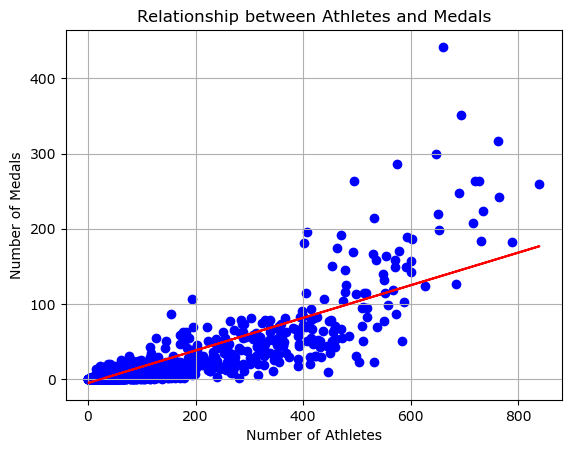

In [9]:
# Scatter plot
plt.scatter(teams['athletes'], teams['medals'], color='blue')

# Fit a regression line
coeffs = np.polyfit(teams['athletes'], teams['medals'], 1)
regression_line = np.poly1d(coeffs)

# Plot regression line
plt.plot(teams['athletes'], regression_line(teams['athletes']), color='red')

# Labels and title
plt.xlabel('Number of Athletes')
plt.ylabel('Number of Medals')
plt.title('Relationship between Athletes and Medals')
plt.grid(True)
plt.show()

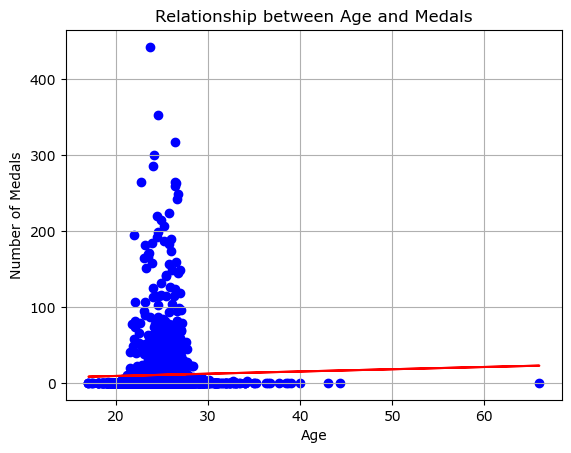

In [10]:
# Scatter plot
plt.scatter(teams['age'], teams['medals'], color='blue')

# Fit a regression line
coeffs = np.polyfit(teams['age'], teams['medals'], 1)
regression_line = np.poly1d(coeffs)

# Plot regression line
plt.plot(teams['age'], regression_line(teams['age']), color='red')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Number of Medals')
plt.title('Relationship between Age and Medals')
plt.grid(True)
plt.show()

<Axes: ylabel='Frequency'>

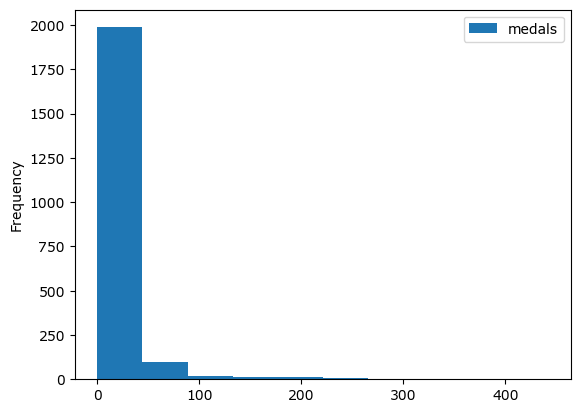

In [12]:
teams.plot.hist(y="medals")

In [16]:
teams[teams.isnull().any(axis=1)]

,team,country,year,events,athletes,age,medals,prev_medals
19,ALB,Albania,1992,8,9,25.3,0,NaN
26,ALG,Algeria,1964,7,7,26.0,0,NaN
39,AND,Andorra,1976,2,3,28.3,0,NaN
50,ANG,Angola,1980,14,17,17.4,0,NaN
59,ANT,Antigua and Barbuda,1976,11,17,23.2,0,NaN
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,0,NaN
2103,YAR,North Yemen,1984,3,3,27.7,0,NaN
2105,YEM,Yemen,1992,8,8,19.6,0,NaN
2112,YMD,South Yemen,1988,5,5,23.6,0,NaN


In [17]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [19]:
train.shape

(1736, 8)

In [20]:
test.shape

(408, 8)

In [38]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [45]:
# Always clean first
train = train.dropna(subset=predictors + [target])
test = test.dropna(subset=predictors + [target])

# Optional: reset index (to avoid index mismatches)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# Now prepare X_train, y_train
X_train = np.column_stack((np.ones(train.shape[0]), train[predictors].values))
y_train = train[target].values

# Prepare training data
X_train = np.column_stack((np.ones(train.shape[0]), train[predictors].values))
y_train = train[target].values

# Calculate coefficients (beta)
beta, residuals, rank, s = np.linalg.lstsq(X_train, y_train, rcond=None)

In [46]:
beta, residuals, rank, s = np.linalg.lstsq(X_train, y_train, rcond=None)

In [47]:
# Prepare testing data
X_test = np.column_stack((np.ones(test.shape[0]), test[predictors].values))

# Predict
predictions = X_test @ beta

# Save predictions in test DataFrame
test["predictions"] = predictions

In [48]:
# Calculate RMSE
rmse = np.sqrt(np.mean((test[target] - test["predictions"]) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 8.18


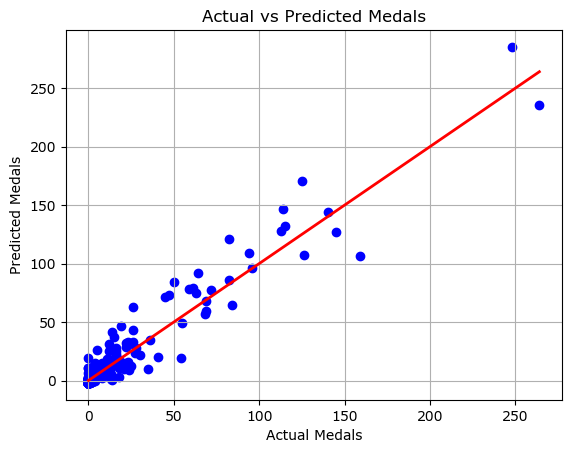

In [49]:
import matplotlib.pyplot as plt

plt.scatter(test[target], test["predictions"], color='blue')
plt.plot([test[target].min(), test[target].max()], [test[target].min(), test[target].max()], color='red', linewidth=2)
plt.xlabel('Actual Medals')
plt.ylabel('Predicted Medals')
plt.title('Actual vs Predicted Medals')
plt.grid(True)
plt.show()

In [50]:
# R-squared calculation
SS_res = np.sum((test[target] - test["predictions"]) ** 2)
SS_tot = np.sum((test[target] - np.mean(test[target])) ** 2)
r_squared = 1 - (SS_res / SS_tot)

print(f"R-squared: {r_squared:.2f}")

R-squared: 0.92


In [51]:
# Add error column
test["error"] = test["predictions"] - test["medals"]

# View sorted by error
test_sorted = test.sort_values("error", ascending=False)

# Display
print(test_sorted[["team", "year", "athletes", "prev_medals", "medals", "predictions", "error"]])

    team  year  athletes  prev_medals  medals  predictions      error
76   CHN  2012       479        184.0     125   170.319135  45.319135
21   AUS  2016       518        114.0      82   120.571799  38.571799
387  USA  2012       689        317.0     248   285.210121  37.210121
204  KOR  2016       263         61.0      26    62.504182  36.504182
53   BRA  2016       583         59.0      50    83.948143  33.948143
..   ...   ...       ...          ...     ...          ...        ...
103  DEN  2016       143         16.0      41    20.121580 -20.878420
94   CRO  2012       118          5.0      35    10.072105 -24.927895
388  USA  2016       719        248.0     264   235.568076 -28.431924
336  SRB  2016       127         16.0      54    18.974319 -35.025681
144  GER  2016       536         94.0     159   106.849957 -52.150043

[405 rows x 7 columns]
